#  Manipulación de datos con Pandas 


In [2]:
import pandas as pd 
import numpy as np 
#Cómo modificar los nombres de las columnas en el dataframe 

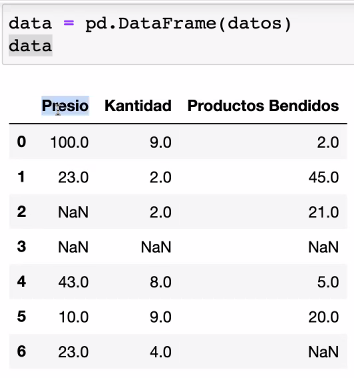

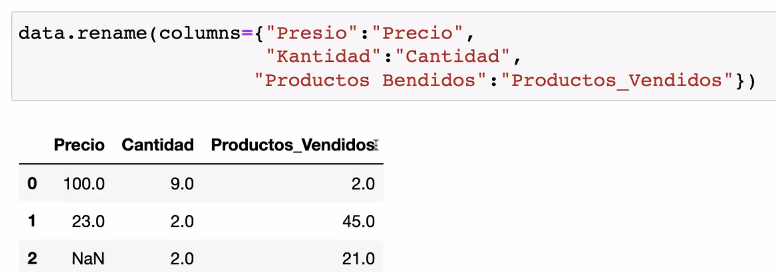

Si quiero que modifique ahí mismo, debo incluir Inplace=True. Si no se hace esto, no se guardarán los cambios

In [4]:
#Datos nulos se pueden escribir como 
nul = np.nan
nul

nan

In [24]:
datos = {
    'Precio' : [100, 23, np.nan, np.nan, 43, 10, 23],
    'Cantidad' : [9, 2, 2, np.nan, 8, 9, 4],
    'Productos Vendidos' : [2, 45, 21, np.nan, 5, 20, np.nan]}
data=pd.DataFrame(datos)
data

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
2,NaN,2.0,21.0
3,NaN,NaN,NaN
4,43.0,8.0,5.0
5,10.0,9.0,20.0
6,23.0,4.0,NaN


In [25]:
#La siguiente función me retorna valores bool para indicar si hay valores nulos
data.isna()

,Precio,Cantidad,Productos Vendidos
0,False,False,False
1,False,False,False
2,True,False,False
3,True,True,True
4,False,False,False
5,False,False,False
6,False,False,True


In [26]:
data.notna()

,Precio,Cantidad,Productos Vendidos
0,True,True,True
1,True,True,True
2,False,True,True
3,False,False,False
4,True,True,True
5,True,True,True
6,True,True,False


In [28]:
#Sumar los valores nulos? Fácil:
data.isna().sum()

Precio                2
Cantidad              1
Productos Vendidos    2
dtype: int64

# Eliminar valores nulos

In [30]:
#Elimina las filas con al menos un NaN
data.dropna()

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
4,43.0,8.0,5.0
5,10.0,9.0,20.0


In [31]:
#Me quiero llevar la fila con al menos un Nan
data.dropna(how="any")

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
4,43.0,8.0,5.0
5,10.0,9.0,20.0


In [32]:
#Quitar la fila que tenga todos su datos nulos
data.dropna(how="all")

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
2,NaN,2.0,21.0
4,43.0,8.0,5.0
5,10.0,9.0,20.0
6,23.0,4.0,NaN


In [37]:
#Para aplicar esto a columnas se agrega axis=1
data.dropna(how="any",axis=1) #aquí eliminó todas

""
0
1
2
3
4
5
6


# Qué hacer cuando tenemos un dato no número en nuestra tabla 


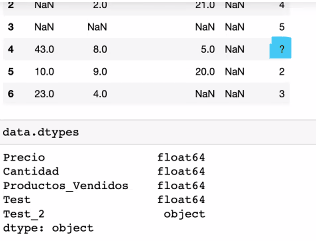

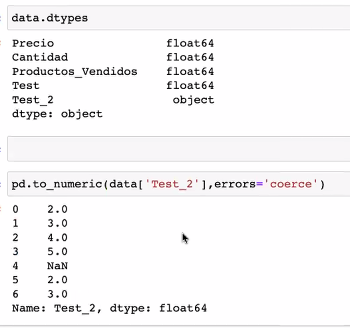

In [39]:
data.iloc[4] #Me da todos los datos de la fila 4

Precio                43.0
Cantidad               8.0
Productos Vendidos     5.0
Name: 4, dtype: float64

In [41]:
data.reset_index(drop=True)

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
2,NaN,2.0,21.0
3,NaN,NaN,NaN
4,43.0,8.0,5.0
5,10.0,9.0,20.0
6,23.0,4.0,NaN


# Imputar valores nulos



In [42]:
#Rellenar los NaN con un número que yo quiera
data.fillna(0)

,Precio,Cantidad,Productos Vendidos
0,100.0,9.0,2.0
1,23.0,2.0,45.0
2,0.0,2.0,21.0
3,0.0,0.0,0.0
4,43.0,8.0,5.0
5,10.0,9.0,20.0
6,23.0,4.0,0.0


In [45]:
#Si no quiero sustituir el NaN, podría intentar llenar este valor con el promedio para que estadísticamente sea más correcto y no afecte el análisis.

data["Productos Vendidos"].fillna(data["Productos Vendidos"].mean())

0     2.0
1    45.0
2    21.0
3    18.6
4     5.0
5    20.0
6    18.6
Name: Productos Vendidos, dtype: float64

# Agrupaciones

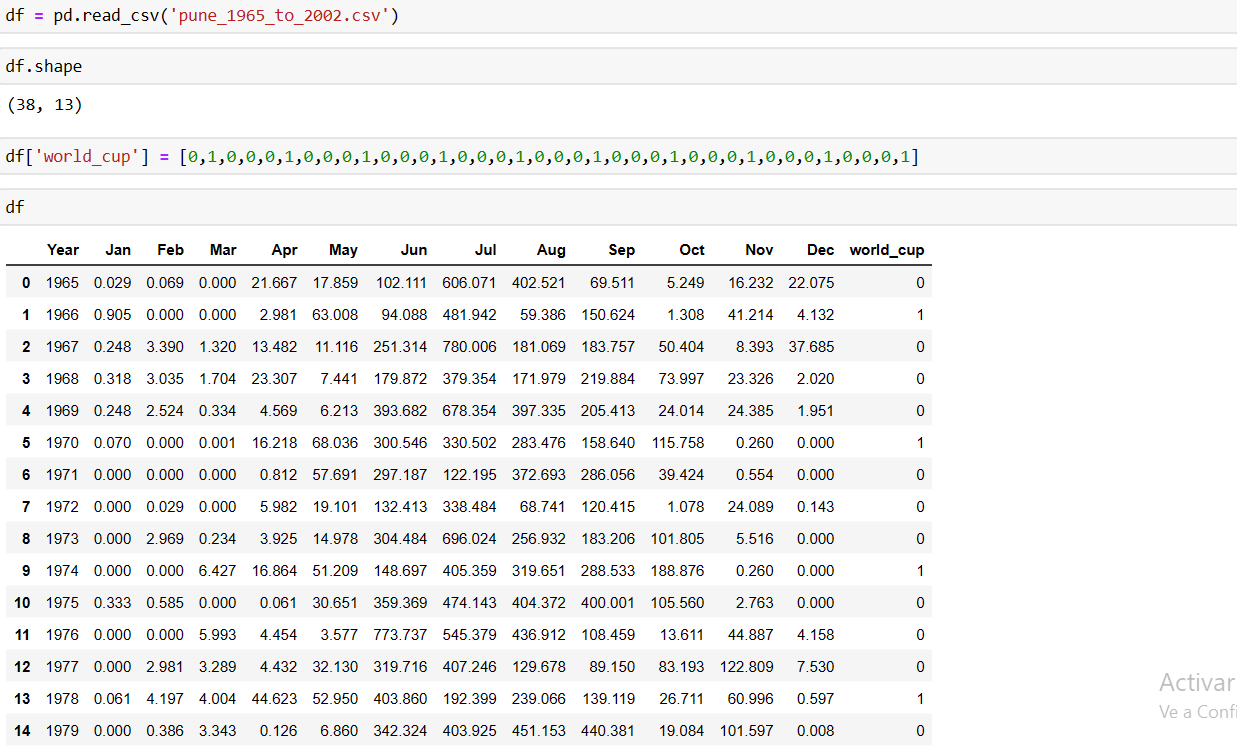

# Manejo de Strings

In [58]:
df = pd.read_csv("C:/Users/USA/Downloads/us_presidents 2.csv")
df

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins
5,5,6,"March 4, 1825","March 4, 1829",John Quincy Adams,8th United States Secretary of State (1817–...,Democratic- Republican,John C. Calhoun
6,6,7,"March 4, 1829","March 4, 1837",Andrew Jackson,U.S. Senator ( Class 2 ) from Tennessee ...,Democratic,John C. Calhoun
7,7,8,"March 4, 1837","March 4, 1841",Martin Van Buren,8th Vice President of the United States,Democratic,Richard Mentor Johnson
8,8,9,"March 4, 1841","April 4, 1841",William Henry Harrison,United States Minister to Colombia (1828–1829),Whig,John Tyler
9,9,10,"April 4, 1841","March 4, 1845",John Tyler,10th Vice President of the United States,"Whig April 4, 1841 – September 13, 1841",Office vacant


In [61]:
#Volver todas las letras minúsculas
df["president"].str.lower()

0          george washington
1                 john adams
2           thomas jefferson
3              james madison
4               james monroe
5          john quincy adams
6             andrew jackson
7           martin van buren
8     william henry harrison
9                 john tyler
10             james k. polk
11            zachary taylor
12          millard fillmore
13           franklin pierce
14            james buchanan
15           abraham lincoln
16            andrew johnson
17          ulysses s. grant
18       rutherford b. hayes
19         james a. garfield
20         chester a. arthur
21          grover cleveland
22         benjamin harrison
23          grover cleveland
24          william mckinley
25        theodore roosevelt
26       william howard taft
27            woodrow wilson
28         warren g. harding
29           calvin coolidge
30            herbert hoover
31     franklin d. roosevelt
32           harry s. truman
33      dwight d. eisenhower
34           j

In [62]:
#Volver todas las letras mayús
df["president"].str.upper()

0          GEORGE WASHINGTON
1                 JOHN ADAMS
2           THOMAS JEFFERSON
3              JAMES MADISON
4               JAMES MONROE
5          JOHN QUINCY ADAMS
6             ANDREW JACKSON
7           MARTIN VAN BUREN
8     WILLIAM HENRY HARRISON
9                 JOHN TYLER
10             JAMES K. POLK
11            ZACHARY TAYLOR
12          MILLARD FILLMORE
13           FRANKLIN PIERCE
14            JAMES BUCHANAN
15           ABRAHAM LINCOLN
16            ANDREW JOHNSON
17          ULYSSES S. GRANT
18       RUTHERFORD B. HAYES
19         JAMES A. GARFIELD
20         CHESTER A. ARTHUR
21          GROVER CLEVELAND
22         BENJAMIN HARRISON
23          GROVER CLEVELAND
24          WILLIAM MCKINLEY
25        THEODORE ROOSEVELT
26       WILLIAM HOWARD TAFT
27            WOODROW WILSON
28         WARREN G. HARDING
29           CALVIN COOLIDGE
30            HERBERT HOOVER
31     FRANKLIN D. ROOSEVELT
32           HARRY S. TRUMAN
33      DWIGHT D. EISENHOWER
34           J

In [63]:
#Poner capital letters
df["president"].str.title()

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21          Grover Cleveland
22         Benjamin Harrison
23          Grover Cleveland
24          William Mckinley
25        Theodore Roosevelt
26       William Howard Taft
27            Woodrow Wilson
28         Warren G. Harding
29           Calvin Coolidge
30            Herbert Hoover
31     Franklin D. Roosevelt
32           Harry S. Truman
33      Dwight D. Eisenhower
34           J

In [65]:
#Separa oraciones
df["prior"].str.split()

0     [Commander-in-Chief, of, the, Continental, Arm...
1       [1st, Vice, President, of, the, United, States]
2       [2nd, Vice, President, of, the, United, States]
3     [5th, United, States, Secretary, of, State, (1...
4     [7th, United, States, Secretary, of, State, (1...
5     [8th, United, States, Secretary, of, State, (1...
6     [U.S., Senator, (, Class, 2, ), from, Tennesse...
7       [8th, Vice, President, of, the, United, States]
8     [United, States, Minister, to, Colombia, (1828...
9      [10th, Vice, President, of, the, United, States]
10          [9th, Governor, of, Tennessee, (1839–1841)]
11    [Major, General, of, the, 1st, Infantry, Regim...
12     [12th, Vice, President, of, the, United, States]
13    [Brigadier, General, of, the, 9th, Infantry, U...
14    [United, States, Minister, to, the, Court, of,...
15    [U.S., Representative, for, Illinois', 7th, Di...
16     [16th, Vice, President, of, the, United, States]
17    [Commanding, General, of, the, U.S., Army,

In [66]:
#reemplazar espacios por guiones
df["prior"].str.replace(" ","-")

0     Commander-in-Chief--of-the--Continental-Army--...
1              1st--Vice-President-of-the-United-States
2              2nd--Vice-President-of-the-United-States
3     5th--United-States-Secretary-of-State---(1801–...
4     7th--United-States-Secretary-of-State---(1811–...
5     8th--United-States-Secretary-of-State---(1817–...
6     U.S.-Senator---(-Class-2-)---from--Tennessee--...
7              8th--Vice-President-of-the-United-States
8      United-States-Minister-to-Colombia---(1828–1829)
9             10th--Vice-President-of-the-United-States
10             9th--Governor-of-Tennessee---(1839–1841)
11    Major-General--of-the--1st-Infantry-Regiment--...
12            12th--Vice-President-of-the-United-States
13    Brigadier-General--of-the--9th-Infantry---Unit...
14    United-States-Minister--to-the---Court-of-St-J...
15    U.S.-Representative--for--Illinois'-7th-Distri...
16            16th--Vice-President-of-the-United-States
17    Commanding-General--of-the-U.S.-Army---(-1